# <div style="text-align: center; background-color:pink; font-family:Georgia, serif; color: black; padding: 20px;line-height: 1;border-radius:5px; border: 2px solid black;">US Data Science and Analytics Master's Programs</div>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data=pd.read_csv('/kaggle/input/us-data-science-and-analytics-masters-programs/ds_masters_usa.csv')

In [3]:
data

,Subject Name,University Name,Per Year Fees,About Program,Program Duration,University Location,Program Name
0,Data Science for Business Leaders,Udacity,218 EUR / module,The Data Science for Business Leaders program ...,1 month,Online,Pre-Master / Part-time / Online
1,Data Science MicroMasters Program,edX - online learning platform,"1,163 EUR / full",EdX is an online learning platform trusted by ...,10 months,Online,Pre-Master / Part-time / Online
2,Data Science,George Mason University,"20,566 EUR / full",This Data Science Postgrad.Cert. program at Ge...,NaN,"Fairfax, Virginia, United States","Postgraduate Certificate / Full-time, Part-tim..."
3,Data Science - Earth Resources,Colorado School of Mines,"18,484 EUR / year",This Data Science - Earth Resources program at...,NaN,Online,Postgraduate Certificate / Part-time / Online
4,Data Science,The University of Texas at Arlington,"21,669 EUR / year",The Master of Science in Data Science degree p...,2 years,"Texas City, Texas, United States",M.Sc. / Full-time / On Campus
...,...,...,...,...,...,...,...
438,Information Technology Management - AI and Dat...,University of Wisconsin Milwaukee,"23,709 EUR / year",The Master of Science in Information Technolog...,1 year,"Milwaukee, Wisconsin, United States",M.Sc. / Full-time / On Campus
439,Data-Driven Decision Making Certificate,Temple University,"16,043 EUR / full",The Data-Driven Decision Making Certificate pr...,NaN,"Philadelphia, Pennsylvania, United States","Postgraduate Certificate / Full-time, Part-tim..."
440,Computer Information Technology - Data Analytics,Northern Arizona University,"13,508 EUR / year",The Computer Information Technology - Data Ana...,1 year,Online,Master / Part-time / Online
441,Datacenter Systems Engineering,Southern Methodist University,"33,215 EUR / year",Students entering the Datacenter Systems Engin...,1 year,"Dallas, Oregon, United States",M.Sc. / Full-time / On Campus


# Data preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Subject Name         443 non-null    object
 1   University Name      443 non-null    object
 2   Per Year Fees        436 non-null    object
 3   About Program        443 non-null    object
 4   Program Duration     427 non-null    object
 5   University Location  443 non-null    object
 6   Program Name         443 non-null    object
dtypes: object(7)
memory usage: 24.4+ KB


In [5]:
data.describe()

,Subject Name,University Name,Per Year Fees,About Program,Program Duration,University Location,Program Name
count,443,443,436,443,427,443,443
unique,199,276,339,434,22,163,40
top,Data Science,Arizona State University,"26,655 EUR / year",Big data means big opportunities for you and y...,1 year,Online,M.Sc. / Full-time / On Campus
freq,135,13,10,2,258,124,160


## Checking null values

In [6]:
data.isnull().sum()

Subject Name            0
University Name         0
Per Year Fees           7
About Program           0
Program Duration       16
University Location     0
Program Name            0
dtype: int64

In [7]:
data.columns

Index(['Subject Name', 'University Name', 'Per Year Fees', 'About Program',
       'Program Duration', 'University Location', 'Program Name'],
      dtype='object')

In [8]:
data['Per Year Fees'].fillna(data['Per Year Fees'].mode()[0],inplace=True)

/tmp/ipykernel_25/2482255076.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Per Year Fees'].fillna(data['Per Year Fees'].mode()[0],inplace=True)


In [9]:
data['Program Duration'].fillna(data['Program Duration'].mode()[0],inplace=True)

/tmp/ipykernel_25/284159722.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Program Duration'].fillna(data['Program Duration'].mode()[0],inplace=True)


In [10]:
data.isnull().sum()

Subject Name           0
University Name        0
Per Year Fees          0
About Program          0
Program Duration       0
University Location    0
Program Name           0
dtype: int64

## checking unique values

In [11]:
for i in data.columns:
    print(i,":",data[i].nunique())

Subject Name : 199
University Name : 276
Per Year Fees : 339
About Program : 434
Program Duration : 22
University Location : 163
Program Name : 40


# Data Visualization

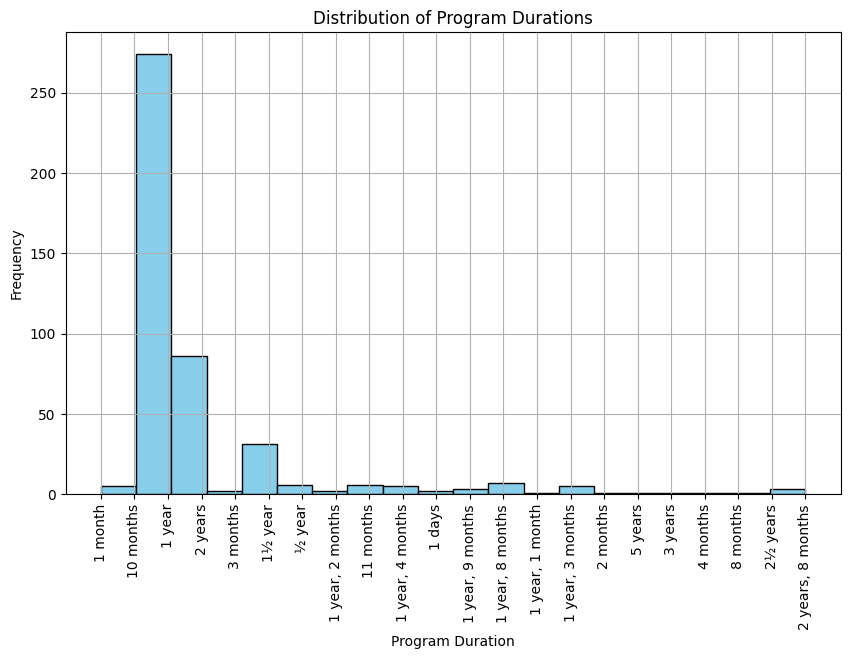

In [12]:
program_durations = data['Program Duration']

# Plotting histogram of program durations
plt.figure(figsize=(10, 6))
plt.hist(program_durations, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Program Durations')
plt.xlabel('Program Duration')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [13]:
data.columns

Index(['Subject Name', 'University Name', 'Per Year Fees', 'About Program',
       'Program Duration', 'University Location', 'Program Name'],
      dtype='object')

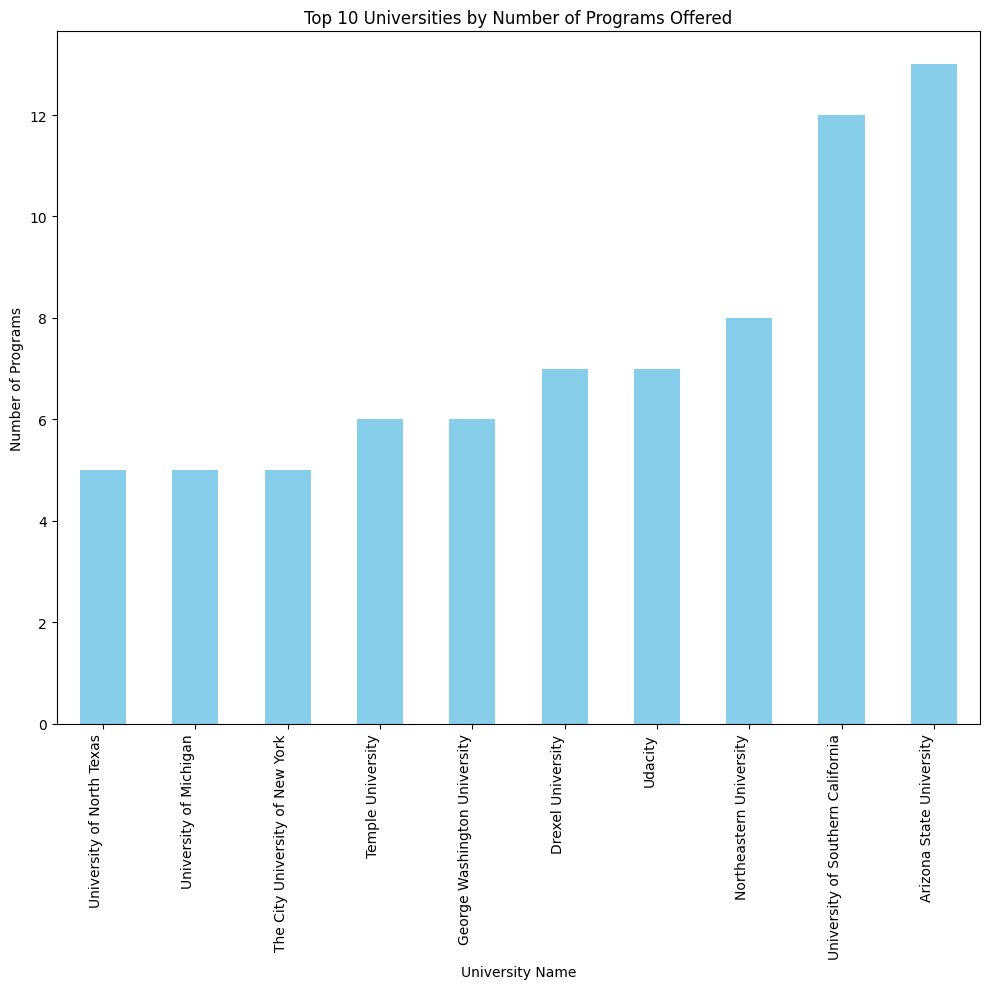

In [14]:
university_counts=data['University Name'].value_counts().sort_values()
# Extracting the top 10 universities
top_10_universities = university_counts.tail(10)
plt.figure(figsize=(10, 10))
# Plotting the bar plot for the top 10 universities
top_10_universities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Universities by Number of Programs Offered')
plt.xlabel('University Name')
plt.ylabel('Number of Programs')
plt.xticks(rotation=90, ha='right')   
plt.tight_layout()  
plt.show()

In [15]:
university_counts

University Name
Maryland Institute College of Art        1
University of New Haven                  1
Embry-Riddle Aeronautical University     1
Illinois Institute of Technology         1
Robert Morris University                 1
                                        ..
Drexel University                        7
Udacity                                  7
Northeastern University                  8
University of Southern California       12
Arizona State University                13
Name: count, Length: 276, dtype: int64

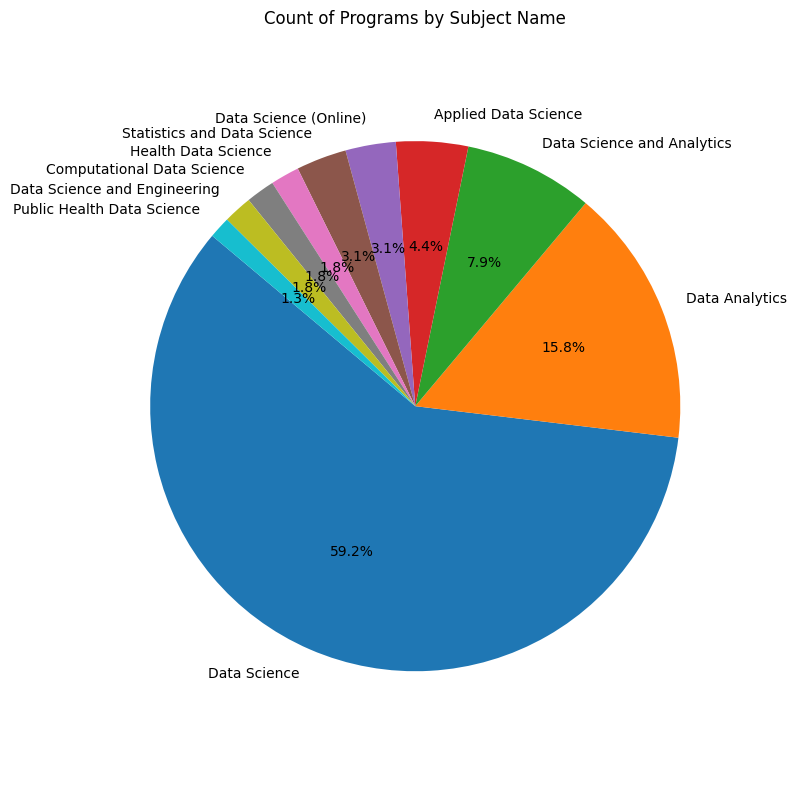

In [16]:
plt.figure(figsize=(8, 8))
subject = data['Subject Name'].value_counts().sort_values(ascending=False).head(10)
plt.pie(subject, labels=subject.index, autopct='%1.1f%%', startangle=140)
plt.title('Count of Programs by Subject Name')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [17]:
subject

Subject Name
Data Science                    135
Data Analytics                   36
Data Science and Analytics       18
Applied Data Science             10
Data Science (Online)             7
Statistics and Data Science       7
Health Data Science               4
Computational Data Science        4
Data Science and Engineering      4
Public Health Data Science        3
Name: count, dtype: int64

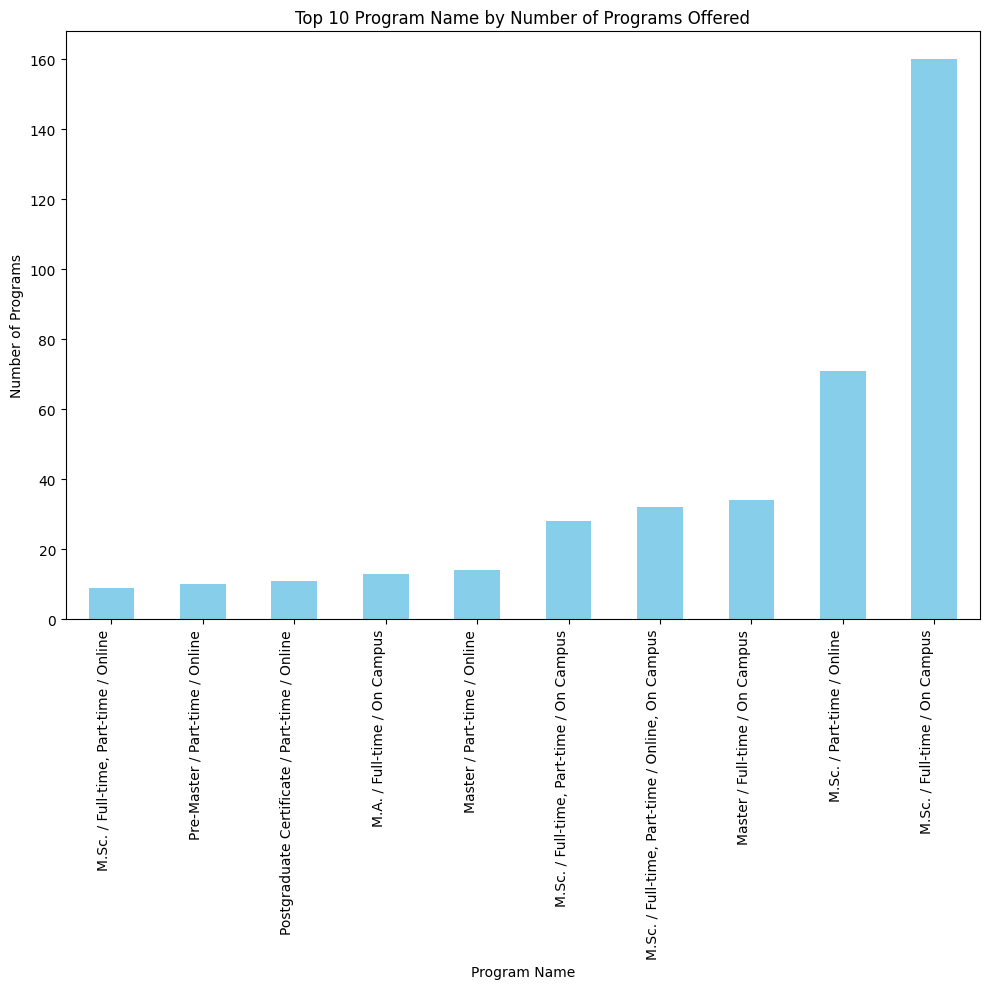

In [18]:
Program_counts=data['Program Name'].value_counts().sort_values()
# Extracting the top 10 universities
top_10_Program = Program_counts.tail(10)
plt.figure(figsize=(10, 10))
# Plotting the bar plot for the top 10 universities
top_10_Program.plot(kind='bar', color='skyblue')
plt.title('Top 10 Program Name by Number of Programs Offered')
plt.xlabel('Program Name')
plt.ylabel('Number of Programs')
plt.xticks(rotation=90, ha='right')   
plt.tight_layout()  
plt.show()

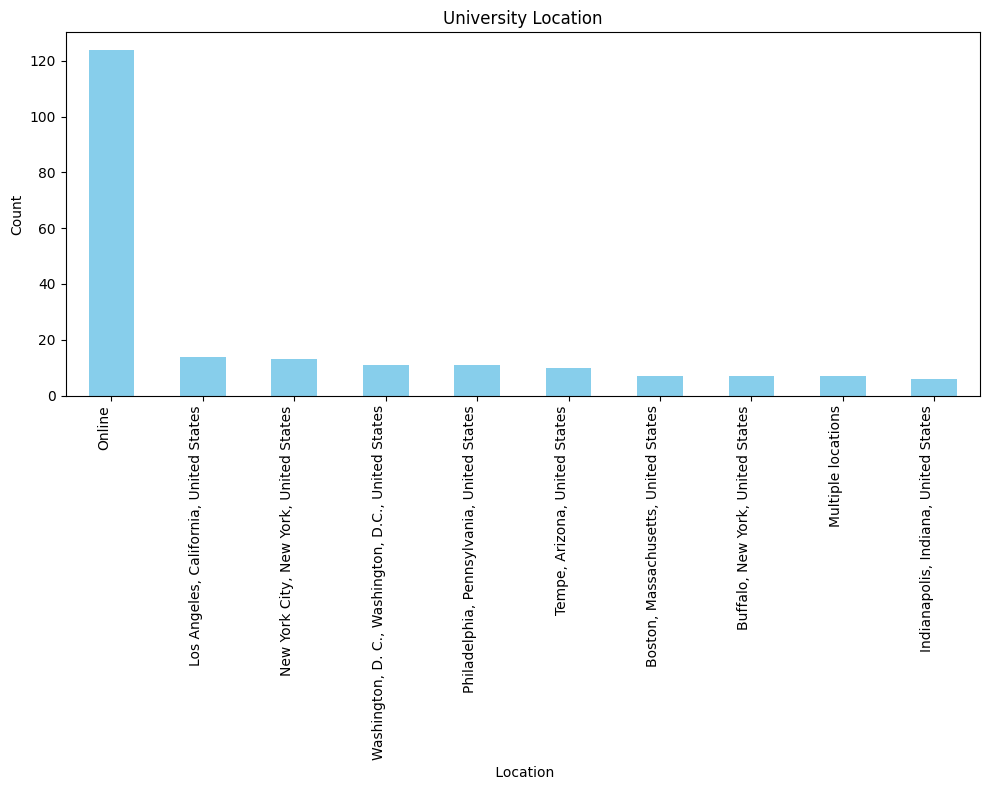

In [19]:
Location=data['University Location'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 8))
# sns.countplot(x=Location.index, data=data, )
Location.plot(kind='bar', color='skyblue')
plt.title('University Location')
plt.xlabel(' Location')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [20]:
Location

University Location
Online                                                124
Los Angeles, California, United States                 14
New York City, New York, United States                 13
Washington, D. C., Washington, D.C., United States     11
Philadelphia, Pennsylvania, United States              11
Tempe, Arizona, United States                          10
Boston, Massachusetts, United States                    7
Buffalo, New York, United States                        7
Multiple locations                                      7
Indianapolis, Indiana, United States                    6
Name: count, dtype: int64

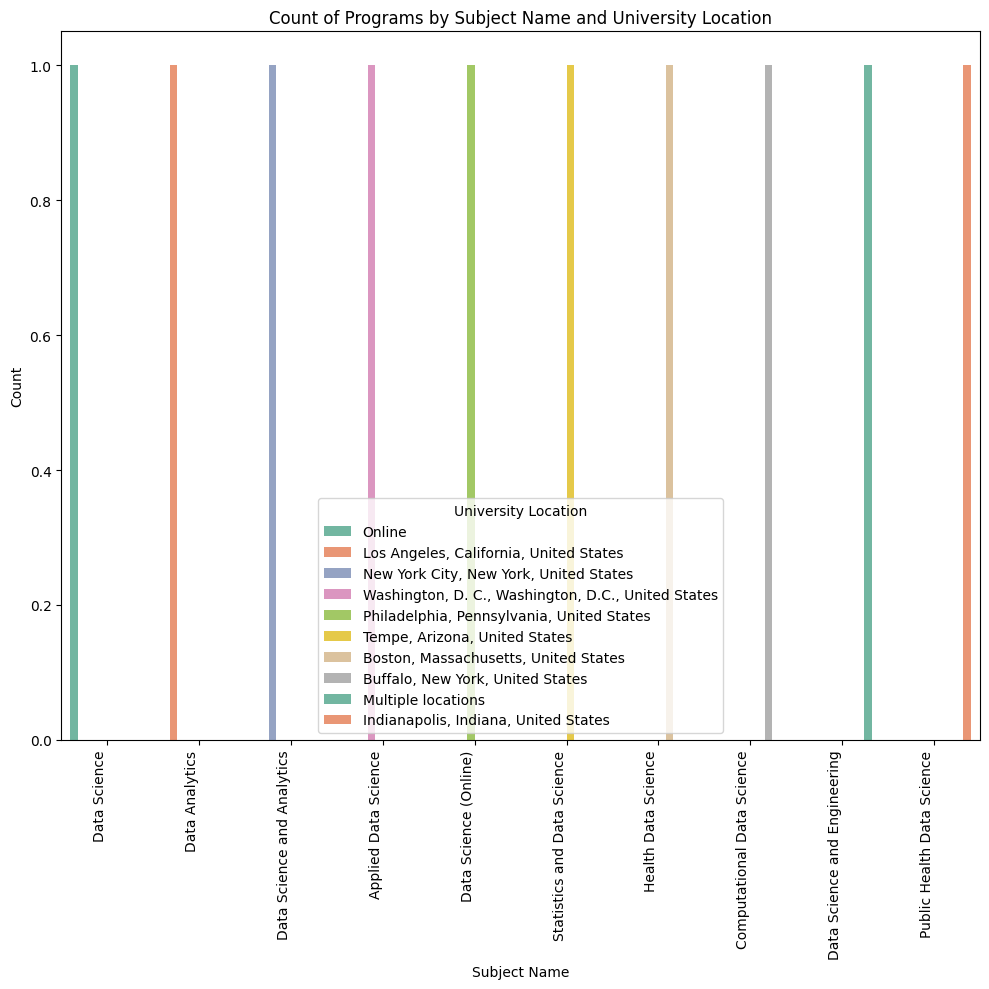

In [21]:
plt.figure(figsize=(10, 10))
sns.countplot(x=subject.index, hue=Location.index, data=data, palette='Set2')
plt.title('Count of Programs by Subject Name and University Location')
plt.xlabel('Subject Name')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='University Location')
plt.tight_layout()
plt.show()

# Recommend programs based on a given program 

In [22]:
# Extracting subject names
subject_names = data['Subject Name']

In [23]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
# Fit and transform the subject names to TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(subject_names)

In [24]:
# Calculate cosine similarity between TF-IDF vectors
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [25]:
# Function to recommend programs based on a given program index
def recommend_programs(program, top_n=5):
    # Find the index of the given program
    program_index = data.index[data['Program Name'] == program]
    
    # Check if the program exists in the DataFrame
    if len(program_index) == 0:
        print("Program not found.")
        return []
    else:
        program_index = program_index[0]
    
    # Get similarity scores of the program with all other programs
    sim_scores = list(enumerate(cosine_sim[program_index]))
    
    # Sort programs based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get top similar programs (excluding the program itself)
    top_similar_programs = sim_scores[1:top_n+1]
    
    # Return program indices of top similar programs
    return [program[0] for program in top_similar_programs]


In [26]:
# Example usage: Recommend programs similar to program at index 0
program_to_recommend = "Pre-Master / Part-time / Online"
recommended_program_indices = recommend_programs(program_to_recommend)
recommended_programs = data.iloc[recommended_program_indices]
recommended_programs

,Subject Name,University Name,Per Year Fees,About Program,Program Duration,University Location,Program Name
153,Applied Data Science for Business,Portland State University,"33,381 EUR / year",The Applied Data Science for Business MSc prog...,1 year,Online,"M.Sc. / Full-time, Part-time / Online"
287,Business Data Analytics,West Virginia University,"22,697 EUR / year",The online Master of Science in Business Data ...,1 year,Online,M.Sc. / Part-time / Online
73,Business Analytics and Data Science,Oklahoma State University,"16,506 EUR / year",The Business Analytics and Data Science from O...,"1 year, 9 months","Stillwater, Oklahoma, United States",M.Sc. / Full-time / On Campus
82,Data Science and Business Analytics,Wayne State University,"49,103 EUR / year",Data Science and Business Analytics at Wayne S...,1 year,"Detroit, Michigan, United States","M.A. / Full-time, Part-time / On Campus"
100,Data Science and Business Analytics,University of Texas at Austin McCombs School o...,"3,506 EUR / full",The Post Graduate Program in Data Science and ...,½ year,Online,Postgraduate Certificate / Part-time / Online


In [27]:
data['Program Name'].values

array(['Pre-Master / Part-time / Online',
       'Pre-Master / Part-time / Online',
       'Postgraduate Certificate / Full-time, Part-time / On Campus, Blended',
       'Postgraduate Certificate / Part-time / Online',
       'M.Sc. / Full-time / On Campus', 'Pre-Master / Part-time / Online',
       'M.Sc. / Part-time / Online', 'M.Sc. / Full-time / On Campus',
       'Master / Full-time / On Campus',
       'M.Sc. / Full-time, Part-time / Online, On Campus, Blended',
       'Postgraduate Certificate / Part-time / Online',
       'M.Sc. / Full-time, Part-time / On Campus',
       'Pre-Master / Part-time / Online', 'M.Sc. / Full-time / On Campus',
       'Postgraduate Certificate / Full-time / On Campus',
       'M.Sc. / Full-time / On Campus', 'M.Sc. / Full-time / On Campus',
       'Postgraduate Certificate / Part-time / Online',
       'M.Sc. / Full-time, Part-time / Online',
       'M.Sc. / Part-time / Online',
       'M.Sc. / Full-time, Part-time / On Campus',
       'Postgraduate 

# Recommend programs based on their program duration

In [28]:
# Extract features and normalize numerical features
features = data[['Subject Name', 'University Name', 'Program Name']].copy()


In [29]:
# Extract numerical values from 'Program Duration' and convert them to float
features['Program Duration'] = data['Program Duration'].str.extract(r'(\d+)').astype(float)
# Drop rows with NaN values in 'Program Duration'
features = features.dropna(subset=['Program Duration'])

In [30]:
# Scale 'Program Duration' using MinMaxScaler
scaler = MinMaxScaler()
features['Program Duration'] = scaler.fit_transform(features[['Program Duration']])


In [31]:
features.head()

,Subject Name,University Name,Program Name,Program Duration
0,Data Science for Business Leaders,Udacity,Pre-Master / Part-time / Online,0.0
1,Data Science MicroMasters Program,edX - online learning platform,Pre-Master / Part-time / Online,0.9
2,Data Science,George Mason University,"Postgraduate Certificate / Full-time, Part-tim...",0.0
3,Data Science - Earth Resources,Colorado School of Mines,Postgraduate Certificate / Part-time / Online,0.0
4,Data Science,The University of Texas at Arlington,M.Sc. / Full-time / On Campus,0.1


In [32]:
# Calculate cosine similarity between program durations
program_duration_similarity = cosine_similarity(features['Program Duration'].values.reshape(-1, 1))


In [33]:
# Recommend programs based on a given program's duration
def recommend_programs(program_index, top_n=5):
    similar_program_indices = program_duration_similarity[program_index].argsort()[::-1][1:top_n+1]
    return data.iloc[similar_program_indices]


In [34]:
# Example usage: Recommend programs similar to program at index 0
recommended_programs = recommend_programs(0)
recommended_programs

,Subject Name,University Name,Per Year Fees,About Program,Program Duration,University Location,Program Name
436,Applied Statistics and Data Analytics,Southern Methodist University,"48,578 EUR / year",Applied Statistics and Data Analytics from Sou...,1½ year,"Dallas, Oregon, United States","M.Sc. / Full-time, Part-time / On Campus"
435,Data Analyst,Simplilearn,"1,099 EUR / full",This Data Analyst from Simplilearn course give...,11 months,Online,M.Sc. / Part-time / Online
434,Information Design and Data Visualization,Northeastern University,"45,435 EUR / year",The MFA Information Design and Data Visualizat...,2 years,"Boston, Massachusetts, United States",Master / Full-time / On Campus
433,Data Analytics,University of Michigan Flint,"15,988 EUR / year",Data Analytics at University of Michigan Flint...,"2 years, 8 months",Online,M.Sc. / Part-time / Online
432,Special Education- Data Directed Student Progr...,University of Southern Maine,"12,262 EUR / year",Special Education- Data Directed Student Progr...,1 year,Online,M.Sc. / Part-time / Online
